In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
stockCSV = pd.read_csv('stockdata.csv')

In [16]:
stockCSV['Foodsum'] = stockCSV['KE=F']+stockCSV['ZR=F']

In [17]:
stockCSV = stockCSV.dropna(how='any') #Cleaning Null Values

In [18]:
stockCSV['Foodsum'] = stockCSV['Foodsum'].round(3)
stockCSV['CL=F'] = stockCSV['CL=F'].round(3)
stockCSV['NG=F'] = stockCSV['NG=F'].round(3)
stockCSV['SQM'] = stockCSV['SQM'].round(3)

stockCSV['GC=F'] = stockCSV['GC=F'].round(3)
stockCSV['ZF=F'] = stockCSV['ZF=F'].round(3)
stockCSV['BRK-A'] = stockCSV['BRK-A'].round(3)
stockCSV['TSLA'] = stockCSV['TSLA'].round(3)

In [19]:
Wheat = pd.DataFrame(stockCSV['KE=F'])
Rice = pd.DataFrame(stockCSV['ZR=F'])
Food = pd.DataFrame(stockCSV['Foodsum'])

Crude = pd.DataFrame(stockCSV['CL=F'])
Nat = pd.DataFrame(stockCSV['NG=F'])

Fert = pd.DataFrame(stockCSV['SQM'])

Gold = pd.DataFrame(stockCSV['GC=F'])
Bonds = pd.DataFrame(stockCSV['ZF=F'])

Berkshire = pd.DataFrame(stockCSV['BRK-A'])
Tesla = pd.DataFrame(stockCSV['TSLA'])

Date = pd.DataFrame(stockCSV['Date'])

# Exploratory Data Analysis (1)

In [20]:
Food.describe()

,Foodsum
count,2503.000000
mean,1869.729724
std,376.943992
min,1290.750000
25%,1580.250000
50%,1757.500000
75%,2187.375000
max,3134.500000


In [21]:
Fert.describe()

,SQM
count,2503.000000
mean,30.406474
std,18.625624
min,8.293000
25%,17.232000
50%,24.539000
75%,38.609000
max,99.507000


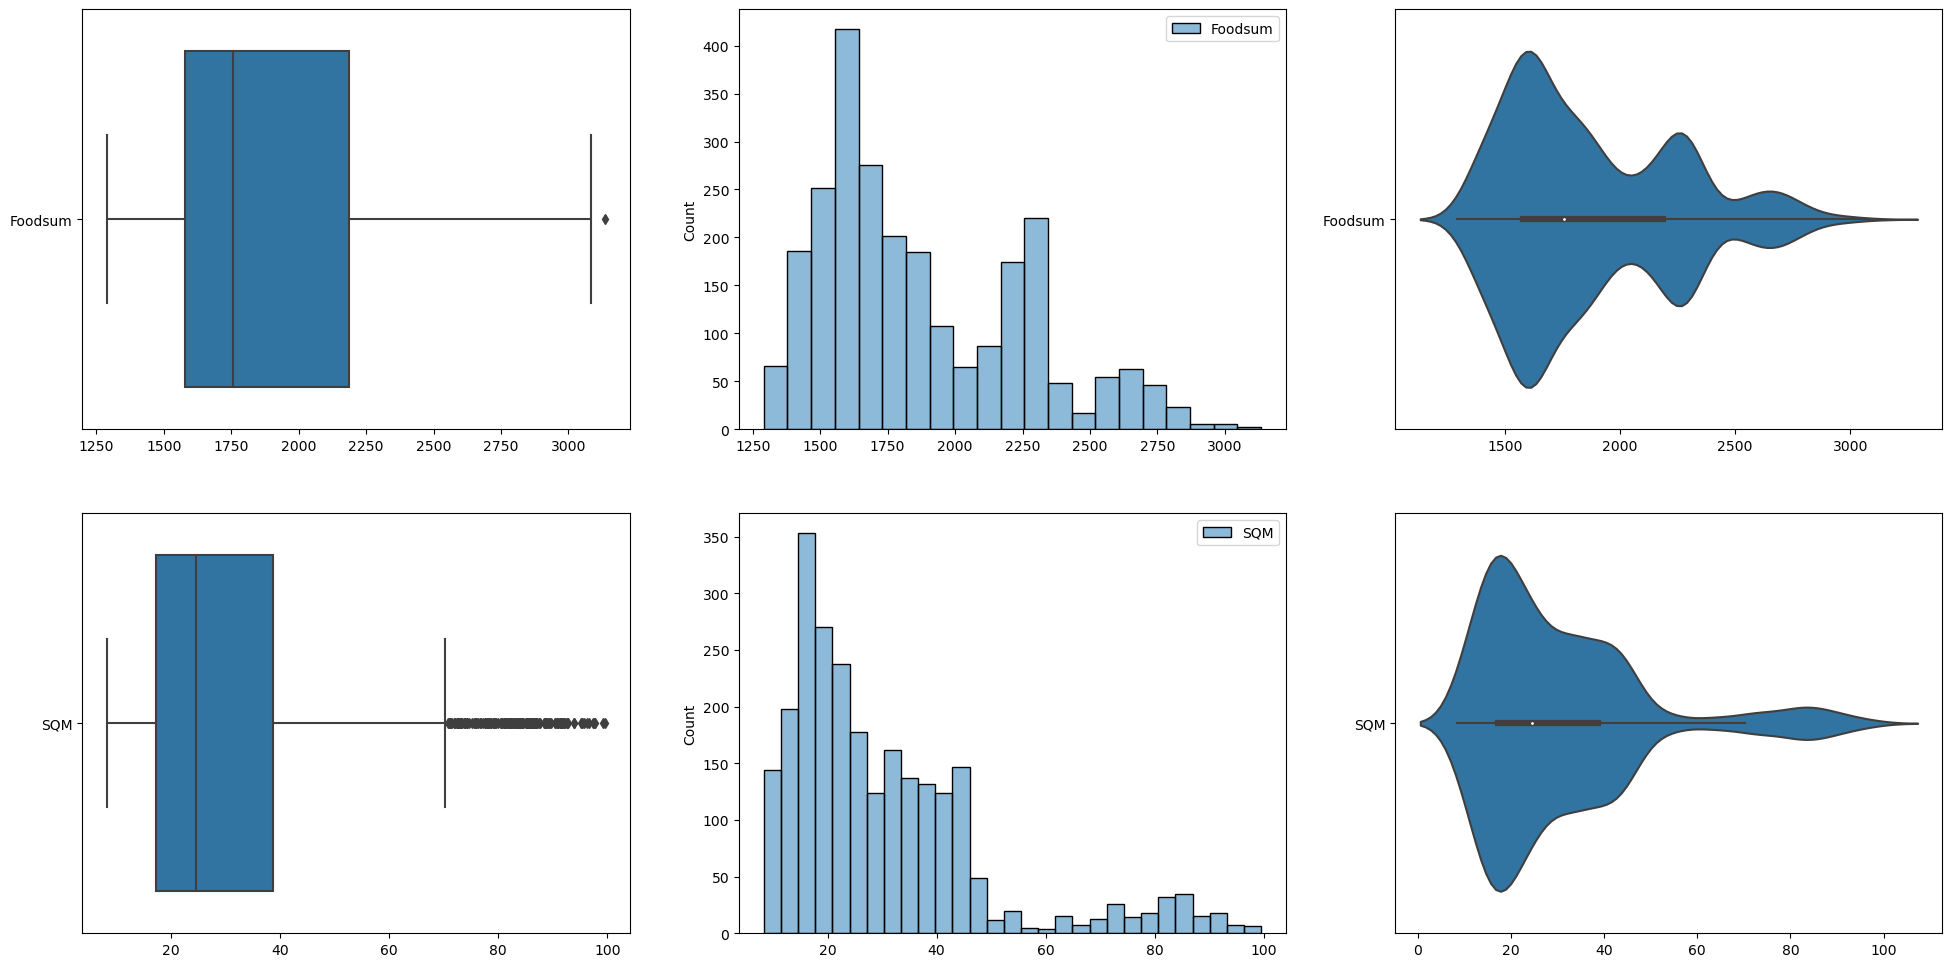

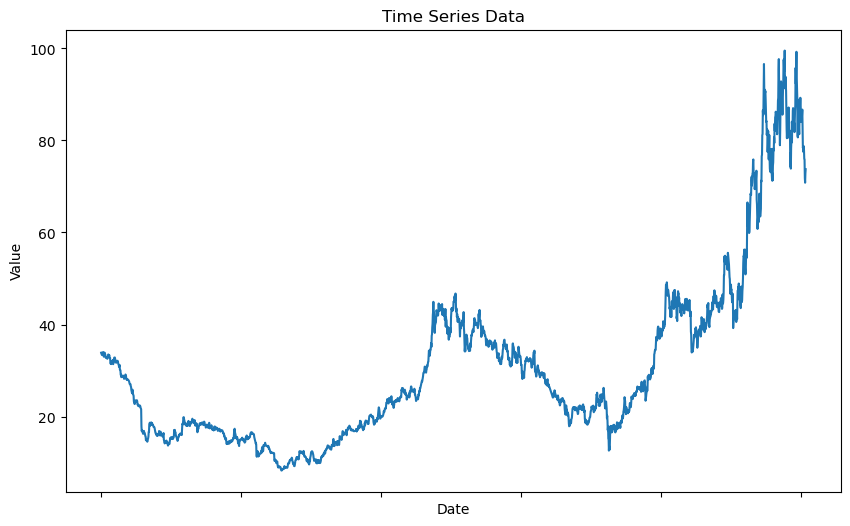

In [22]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = Food, orient = "h", ax = axes[0,0])
sb.histplot(data = Food, ax = axes[0,1])
sb.violinplot(data = Food, orient = "h", ax = axes[0,2])

sb.boxplot(data = Fert, orient = "h", ax = axes[1,0])
sb.histplot(data = Fert, ax = axes[1,1])
sb.violinplot(data = Fert, orient = "h", ax = axes[1,2])

import matplotlib.pyplot as plt
import pandas as pd

# Sample time series data (you can replace this with your own data)
dates = pd.date_range('2013-01-01', '2023-01-01', freq='M')
data = pd.Series(range(len(dates)), index=dates)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Fert)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(False)
plt.xticks(visible=False)
plt.show()

SQM has many outliers of values above 1.5x of the 75th percentile. These higher values are likely a result of the Russian Invasion of Ukraine in 2022, which sent the price of Fertilizer soaring and the price of shares in the company above 80USD for the first time in all its trading history.


In [23]:
Crude.describe()

,CL=F
count,2503.000000
mean,65.807575
std,22.657453
min,-37.630000
25%,48.515000
50%,59.680000
75%,86.495000
max,123.700000


While it may be surprising that the minimum price of crude oil is negative (-37.63USD), it is not an abnormaly as Oil prices have indeed went negative before.

https://www.cnbc.com/2020/06/16/how-negative-oil-prices-revealed-the-dangers-of-futures-trading.html

In [24]:
Nat.describe()

,NG=F
count,2503.000000
mean,3.420989
std,1.400302
min,1.482000
25%,2.625500
50%,2.959000
75%,3.896500
max,9.680000


<Axes: >

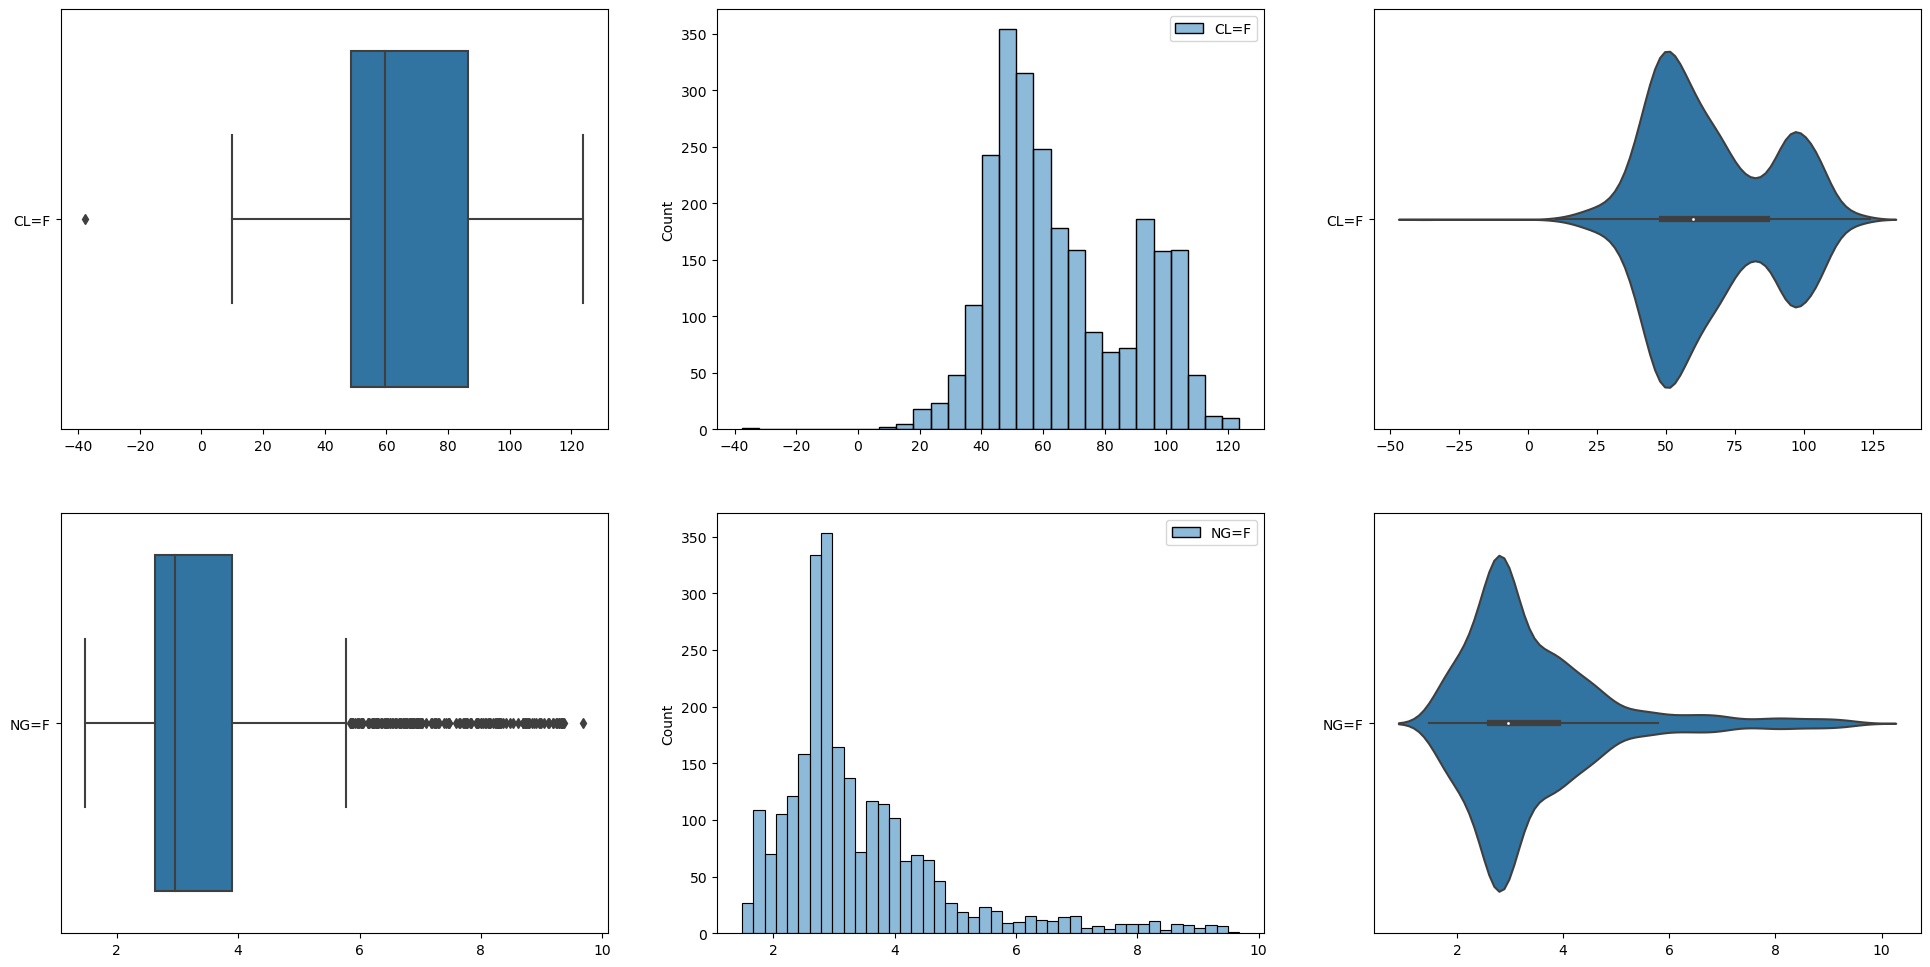

In [25]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = Crude, orient = "h", ax = axes[0,0])
sb.histplot(data = Crude, ax = axes[0,1])
sb.violinplot(data = Crude, orient = "h", ax = axes[0,2])

sb.boxplot(data = Nat, orient = "h", ax = axes[1,0])
sb.histplot(data = Nat, ax = axes[1,1])
sb.violinplot(data = Nat, orient = "h", ax = axes[1,2])

Natural Gas [NG=F] has MANY OUTLIERs. It could be argued that these Outliers SHOULD BE removed but we believe the Volatile Nature of Natural Gas Prices are BEST represented by leaving the outliers within the dataset.

In [26]:
Gold.describe()

,GC=F
count,2503.000000
mean,1438.280463
std,256.634953
min,1050.800000
25%,1242.600000
50%,1318.100000
75%,1708.600000
max,2051.500000


In [27]:
Bonds.describe()

,ZF=F
count,2503.000000
mean,119.220623
std,4.228890
min,105.664000
25%,117.492000
50%,119.633000
75%,121.574000
max,126.211000


<Axes: >

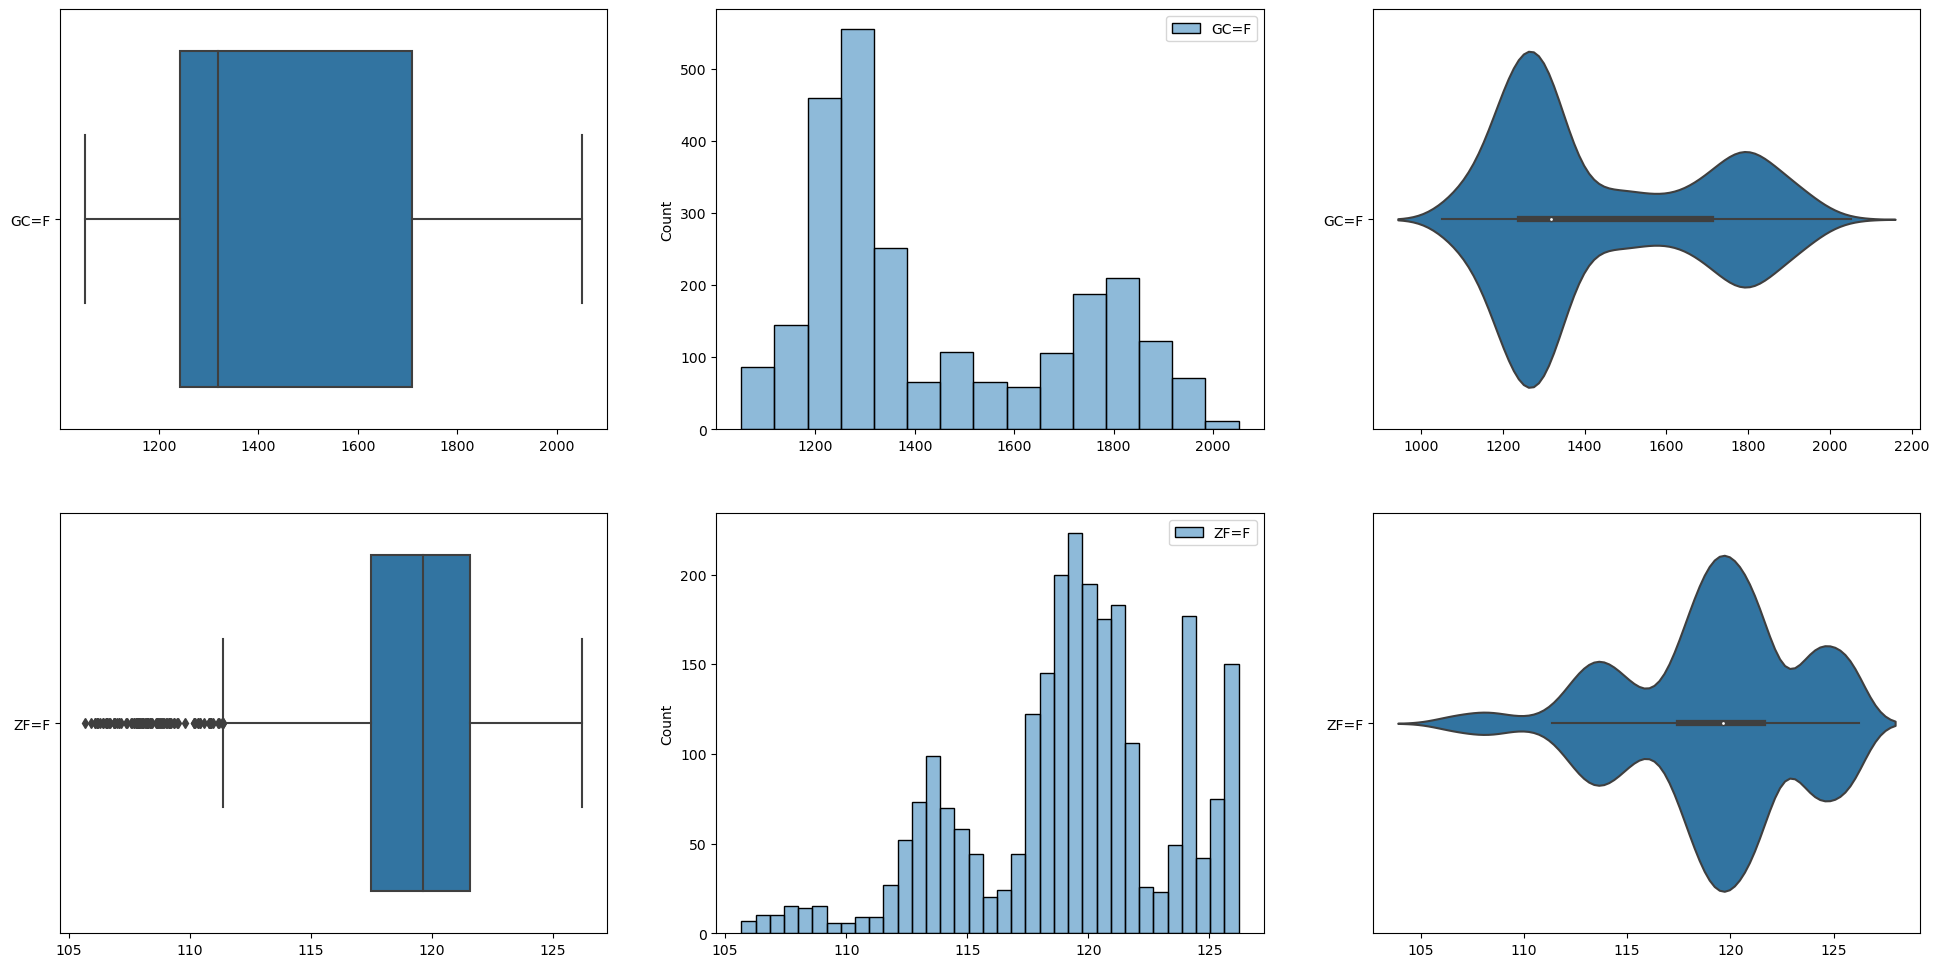

In [28]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = Gold, orient = "h", ax = axes[0,0])
sb.histplot(data = Gold, ax = axes[0,1])
sb.violinplot(data = Gold, orient = "h", ax = axes[0,2])

sb.boxplot(data = Bonds, orient = "h", ax = axes[1,0])
sb.histplot(data = Bonds, ax = axes[1,1])
sb.violinplot(data = Bonds, orient = "h", ax = axes[1,2])

As with Natural Gas, Bond prices do fluctuate wildly and removing Outliers for the sake of improving data consistency would negate the very idea of fairness in comparing which variable has the best correlation with food prices. 

In [29]:
Berkshire.describe()

,BRK-A
count,2503.000000
mean,284409.869756
std,92199.786970
min,139610.000000
25%,210677.500000
50%,275000.000000
75%,328325.500000
max,539180.000000


In [30]:
Tesla.describe()

,TSLA
count,2503.000000
mean,73.456414
std,102.171036
min,2.194000
25%,14.574500
50%,19.032000
75%,92.141500
max,409.970000


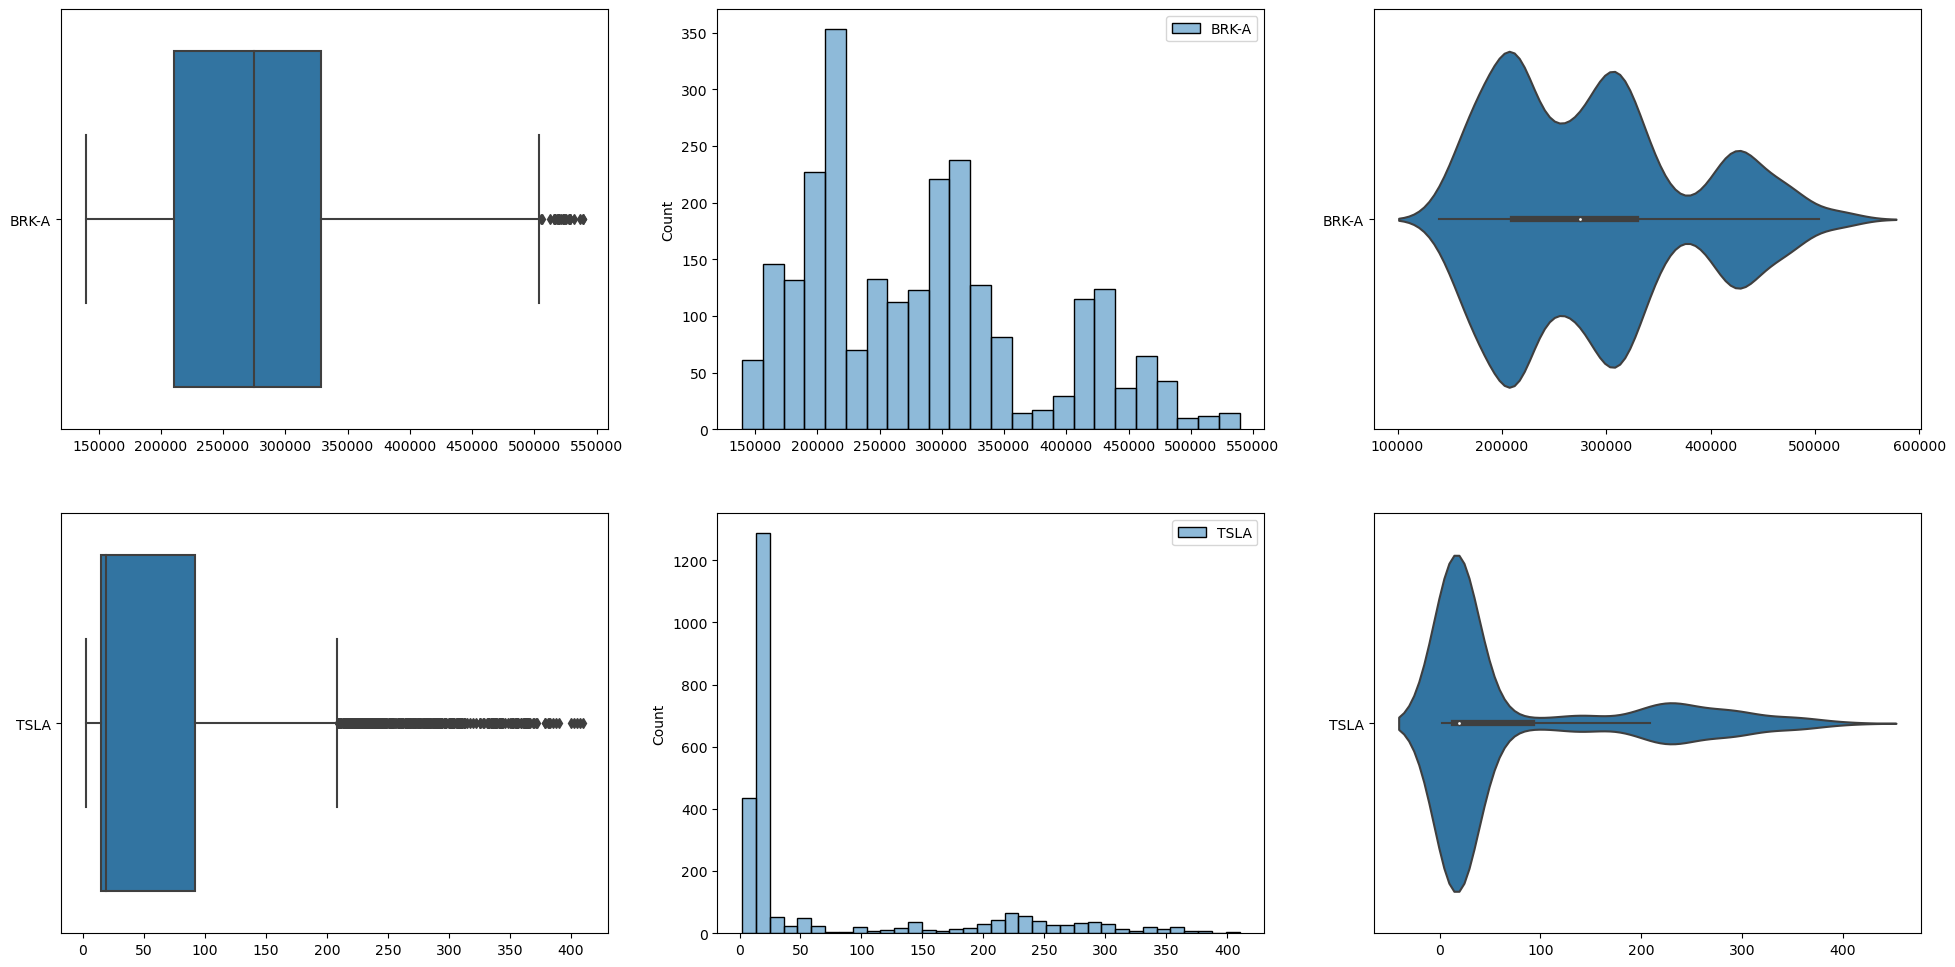

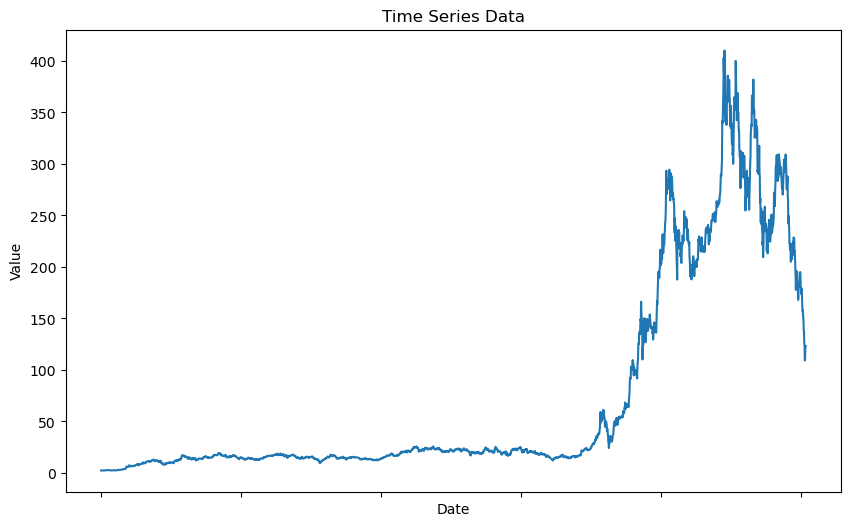

In [31]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = Berkshire, orient = "h", ax = axes[0,0])
sb.histplot(data = Berkshire, ax = axes[0,1])
sb.violinplot(data = Berkshire, orient = "h", ax = axes[0,2])

sb.boxplot(data = Tesla , orient = "h", ax = axes[1,0])
sb.histplot(data = Tesla , ax = axes[1,1])
sb.violinplot(data = Tesla , orient = "h", ax = axes[1,2])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Tesla)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(False)
plt.xticks(visible=False)
plt.show()

TSLA spent the Majority of its time on the stock market trading below 55.67 before 1st May 2020. From 1st AUG 2019 to 1st AUG 2020 it skyrocketed from 15.04 to 166.11. From 2020 onwards, it has consistently stayed above 166.11. It thus has a large amount of Outliers. Removing these Outliers would compromise the integirty of the data and the story it tells.